In [1]:
import pickle

with open("data.pkl", "rb") as file:
    data = pickle.load(file)
    file.close()
data

close  pre_close   predict       ret     index  \
time       code                                                          
2017-01-10 000001.SZ  1043.67    1043.67  1.180000  0.000000 -0.000000   
           000002.SZ  2539.39    2549.26  1.180000 -0.003872  1.926607   
           000004.SZ   322.04     320.25  1.180000  0.005589 -2.781340   
           000005.SZ    71.66      72.28  1.180000 -0.008578  4.268387   
           000006.SZ   412.85     420.88  1.180000 -0.019079  9.493962   
...                       ...        ...       ...       ...       ...   
2022-03-16 688799.SH    35.35      35.00  1.410053  0.010000  0.331179   
           688800.SH    97.66      89.40  1.410053  0.092394  3.059890   
           688819.SH    31.88      30.95  1.410053  0.030048  0.995143   
           688981.SH    46.28      45.29  1.410053  0.021859  0.723929   
           689009.SH    42.03      40.88  1.410053  0.028131  0.931645   

                         label  
time       code                 
2017-01-10 000001.SZ  0.004355  
           000002.SZ  0.003887  
           000004.SZ  0.022126  
           000005.SZ  0.009265  
           000006.SZ  0.010659  
...                        ...  
2022-03-16 688799.SH  0.021370  
           688800.SH -0.020839  
           688819.SH  0.006207  
           688981.SH  0.006668  
           689009.SH  0.001834  

[4167587 rows x 6 columns]

构造因子, 由 股票相对指数的强弱(股票收益率/指数收益率) 乘 当天的情感指数 计算得出

具体构建方法: 
    
$$F_{i,t} = \frac{r_{i, t}}{\bar{r_t}} * sentiment_t$$

$$ = \frac{\frac{close_{i, t}}{close_{i, t-1}} - 1}{\frac{1}{n}\sum^n_{j=1}(\frac{close_{j, t}}{close_{j, t-1}} - 1)} * sentiment_t$$

其中, $\frac{r_{i, t}}{\bar{r_t}}$即$index_{i, t}$, $sentiment_t$即$predict_t$

经济学意义: 
将因子表达式稍作变形得$F_{i,t} = \frac{sentiment_t}{\bar{r_t}} * r_{i, t}$。段江娇等(2014)研究得出, 论坛情绪指数的上涨会导致上证A指收益率的下降。故构造除法表达式$\frac{sentiment_t}{\bar{r_t}}$表示情感指数对股票指数的作用, 乘上个股的收益率作为个股的因子收益。


PS: 

目标值label的构建方法为$label_{i, t} = \frac{close_{i, t+2}}{close_{i, t+1}} - 1$, 意为T+1尾盘下单, T+2尾盘平仓的收益率

In [2]:
data["factor"] = data["index"] * data["predict"]
data

close  pre_close   predict       ret     index  \
time       code                                                          
2017-01-10 000001.SZ  1043.67    1043.67  1.180000  0.000000 -0.000000   
           000002.SZ  2539.39    2549.26  1.180000 -0.003872  1.926607   
           000004.SZ   322.04     320.25  1.180000  0.005589 -2.781340   
           000005.SZ    71.66      72.28  1.180000 -0.008578  4.268387   
           000006.SZ   412.85     420.88  1.180000 -0.019079  9.493962   
...                       ...        ...       ...       ...       ...   
2022-03-16 688799.SH    35.35      35.00  1.410053  0.010000  0.331179   
           688800.SH    97.66      89.40  1.410053  0.092394  3.059890   
           688819.SH    31.88      30.95  1.410053  0.030048  0.995143   
           688981.SH    46.28      45.29  1.410053  0.021859  0.723929   
           689009.SH    42.03      40.88  1.410053  0.028131  0.931645   

                         label     factor  
time       code                            
2017-01-10 000001.SZ  0.004355  -0.000000  
           000002.SZ  0.003887   2.273397  
           000004.SZ  0.022126  -3.281981  
           000005.SZ  0.009265   5.036696  
           000006.SZ  0.010659  11.202875  
...                        ...        ...  
2022-03-16 688799.SH  0.021370   0.466980  
           688800.SH -0.020839   4.314607  
           688819.SH  0.006207   1.403205  
           688981.SH  0.006668   1.020779  
           689009.SH  0.001834   1.313668  

[4167587 rows x 7 columns]

In [3]:
data.corr(method="spearman")

close  pre_close   predict       ret     index     label  \
close      1.000000   0.999255  0.014722  0.011170  0.004320 -0.016819   
pre_close  0.999255   1.000000  0.014951 -0.017959  0.004631 -0.016577   
predict    0.014722   0.014951  1.000000 -0.001544  0.000989 -0.019331   
ret        0.011170  -0.017959 -0.001544  1.000000 -0.004667 -0.003720   
index      0.004320   0.004631  0.000989 -0.004667  1.000000  0.010756   
label     -0.016819  -0.016577 -0.019331 -0.003720  0.010756  1.000000   
factor     0.004827   0.005131  0.035382 -0.003915  0.998291  0.010757   

             factor  
close      0.004827  
pre_close  0.005131  
predict    0.035382  
ret       -0.003915  
index      0.998291  
label      0.010757  
factor     1.000000

In [4]:
data["factor"].describe()

count    4.167587e+06
mean     1.243136e+00
std      4.629738e+04
min     -5.920254e+06
25%     -5.899428e-01
50%      1.111216e+00
75%      3.076183e+00
max      5.920254e+06
Name: factor, dtype: float64

将该因子放到多因子模型中进行测试，其它因子包括股票收盘价的0-59阶滞后项, 和股票收益率的2-59阶滞后项。收盘价因子做了除单位处理。

In [5]:
X = data[["factor", "close", "label"]]
# X = data[["close", "label"]]
for i in range(1, 59):
    X["close_" + str(i)] = X["close"].groupby("code").shift(i) / X["close"]
    if i > 1:
        X["label_" + str(i)] = X["label"].groupby("code").shift(i)
X["close"] /= data["pre_close"]
X.dropna(inplace=True)
X

E:\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\Anaconda3.5\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


factor     close     label   close_1   close_2  \
time       code                                                          
2017-11-16 000001.SZ -4.246859  1.015502  0.081179  0.984735  0.988548   
           000002.SZ -4.816321  1.017580  0.000000  0.982723  0.984796   
           000005.SZ -0.000000  1.000000 -0.019608  1.000000  1.004428   
           000008.SZ  3.025616  0.988956  0.006799  1.011167  0.995533   
           000009.SZ  0.340800  0.998756  0.016132  1.001246  1.006539   
...                        ...       ...       ...       ...       ...   
2022-03-16 688799.SH  0.466980  1.010000  0.021370  0.990099  1.038190   
           688800.SH  4.314607  1.092394 -0.020839  0.915421  0.949314   
           688819.SH  1.403205  1.030048  0.006207  0.970828  1.003450   
           688981.SH  1.020779  1.021859  0.006668  0.978608  1.049914   
           689009.SH  1.313668  1.028131  0.001834  0.972639  1.042827   

                       label_2   close_3   label_3   close_4   label_4  ...  \
time       code                                                         ...   
2017-11-16 000001.SZ  0.015502  0.984735 -0.003857  0.938933  0.003872  ...   
           000002.SZ  0.017580  0.935038 -0.002104  0.950589  0.053214  ...   
           000005.SZ  0.000000  0.997892 -0.004408  1.000000  0.006550  ...   
           000008.SZ -0.011044  0.993300  0.015704  1.004467  0.002249  ...   
           000009.SZ -0.001244  1.033629 -0.005259  1.038767 -0.026209  ...   
...                        ...       ...       ...       ...       ...  ...   
2022-03-16 688799.SH  0.010000  1.038190 -0.046322  1.009901  0.000000  ...   
           688800.SH  0.092394  0.977370 -0.035703  0.994266 -0.028706  ...   
           688819.SH  0.030048  1.041092 -0.032510  1.028858 -0.036155  ...   
           688981.SH  0.021859  1.074762 -0.067915  1.085350 -0.023120  ...   
           689009.SH  0.028131  1.112301 -0.067305  1.165596 -0.062460  ...   

                      close_54  label_54  close_55  label_55  close_56  \
time       code                                                          
2017-11-16 000001.SZ  0.692251 -0.003266  0.697516  0.000000  0.693755   
           000002.SZ  0.694883  0.004855  0.691540  0.000479  0.691207   
           000005.SZ  1.372971  0.044565  1.403120  0.004760  1.401012   
           000008.SZ  1.023093  0.017968  0.966330 -0.011945  0.961863   
           000009.SZ  1.200996  0.011622  1.216410  0.000000  1.212518   
...                        ...       ...       ...       ...       ...   
2022-03-16 688799.SH  1.085714  0.012752  1.082885 -0.019281  1.074965   
           688800.SH  1.415114 -0.029694  1.448904  0.064906  1.326336   
           688819.SH  1.367629 -0.021365  1.367629 -0.001606  1.349122   
           688981.SH  1.145635 -0.004357  1.146932 -0.004338  1.142394   
           689009.SH  1.595051 -0.008332  1.507970 -0.015364  1.485368   

                      label_56  close_57  label_57  close_58  label_58  
time       code                                                         
2017-11-16 000001.SZ -0.001085  0.687739  0.005420  0.688491  0.004355  
           000002.SZ  0.010203  0.701902 -0.002411  0.687865  0.003887  
           000005.SZ  0.001538  1.388151 -0.003146  1.510858  0.009265  
           000008.SZ  0.033722  0.974126 -0.004558  1.054277  0.010537  
           000009.SZ -0.001036  1.233224 -0.007369  1.367118  0.010641  
...                        ...       ...       ...       ...       ...  
2022-03-16 688799.SH  0.002612  1.074965  0.007368  1.089958  0.000000  
           688800.SH -0.023322  1.353676  0.092411  1.374565 -0.020197  
           688819.SH  0.000000  1.392409  0.013718  1.418130 -0.031088  
           688981.SH -0.001130  1.155791  0.003972  1.154710 -0.011591  
           689009.SH  0.057747  1.457292  0.015217  1.439448  0.019265  

[3896173 rows x 118 columns]

## 划分数据集: 
测试集是2020年3月17日到2022年3月16日，共3年；训练集和验证集是2017年11月16日到2020年3月16日，采用随机拆分的方式拆分  
## 处理数据集: 
训练集和验证集的因子和目标值均在截面上进行标准化: 
$$X_t = \frac{X_t-\mu_t}{\sigma_t}$$

测试集的因子在截面上标准化, 目标值使用滞后2天的数据在截面上标准化, 截面上的均值和标准差缺失值分别按年化5$\%$和年化30$\%$进行填充

最后使用向后填充的方法填充缺失值，并剔除剩余缺失值.

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1906126 entries, (Timestamp('2017-11-16 00:00:00'), '000001.SZ') to (Timestamp('2020-03-17 00:00:00'), '688399.SH')
Columns: 118 entries, factor to label_58
dtypes: float64(118)
memory usage: 1.7+ GB
None
X_mis= 0.0
clean dataset done 

split data done 

label norm done 



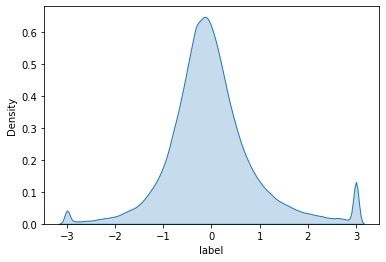

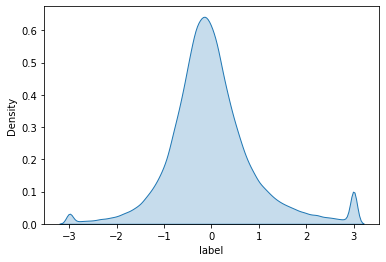

norm data done 

all works done 



In [6]:
import scutquant.scutquant as q

X.index.names = ["datetime", "instrument"]
X_train = X[X.index.get_level_values(0) <= "2020-03-17"]
X_test = X[~X.index.isin(X_train.index)]

result = q.auto_process(X_train, "label", groupby="instrument", datetime="datetime", 
                        split_params={"method": "split", "params": {"test": 0.2}}, select=False, orth=False)
X_train, y_train, X_valid, y_valid = result["X_train"], result["y_train"], result["X_test"], result["y_test"]

y_test = X_test.pop("label")
x_mean, x_std = X_test.groupby("datetime").mean(), X_test.groupby("datetime").std()
X_test = q.zscorenorm(X_test, x_mean, x_std)

y_mean = y_test.groupby("instrument").shift(2).groupby("datetime").mean()
y_std = y_test.groupby("instrument").shift(2).groupby("datetime").std()
y_mean.fillna(0.0002, inplace=True)  # 假设年化5%, 则每天应为0.0002
y_std.fillna(0.0189, inplace=True)  # 假设年化波动率为30%, 即0.3, 则每天的波动率应为0.0189

X_test = X_test.groupby("instrument").fillna(method="ffill").dropna()
y_test = y_test[y_test.index.isin(X_test.index)]

In [7]:
X_train.describe()

factor         close       close_1       close_2       label_2  \
count  1.524901e+06  1.524901e+06  1.524901e+06  1.524901e+06  1.524901e+06   
mean  -4.873109e-04 -1.279073e-02  6.626506e-03  3.762467e-03 -1.268554e-02   
std    9.165880e-01  9.158629e-01  9.240351e-01  9.129077e-01  9.165003e-01   
min   -3.000000e+00 -3.000000e+00 -3.000000e+00 -3.000000e+00 -3.000000e+00   
25%   -4.691833e-01 -5.037760e-01 -4.062268e-01 -4.147135e-01 -5.039976e-01   
50%   -4.180436e-02 -8.965209e-02  6.895282e-02  5.381028e-02 -8.954429e-02   
75%    4.345833e-01  3.813417e-01  4.963021e-01  4.818315e-01  3.819278e-01   
max    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   

            close_3       label_3       close_4       label_4       close_5  \
count  1.524901e+06  1.524901e+06  1.524901e+06  1.524901e+06  1.524901e+06   
mean   1.809550e-03 -1.276856e-02  3.032832e-04 -1.264674e-02 -9.673544e-04   
std    9.092395e-01  9.161394e-01  9.063789e-01  9.159496e-01  9.038290e-01   
min   -3.000000e+00 -3.000000e+00 -3.000000e+00 -3.000000e+00 -3.000000e+00   
25%   -4.219103e-01 -5.037655e-01 -4.284019e-01 -5.029651e-01 -4.341019e-01   
50%    4.754740e-02 -8.959987e-02  4.382163e-02 -8.998132e-02  4.060691e-02   
75%    4.774511e-01  3.811450e-01  4.770662e-01  3.804163e-01  4.768205e-01   
max    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   

       ...      close_54      label_54      close_55      label_55  \
count  ...  1.524901e+06  1.524901e+06  1.524901e+06  1.524901e+06   
mean   ... -1.739508e-02 -1.198424e-02 -1.747680e-02 -1.208368e-02   
std    ...  8.610875e-01  9.160678e-01  8.600526e-01  9.156957e-01   
min    ... -3.000000e+00 -3.000000e+00 -3.000000e+00 -3.000000e+00   
25%    ... -4.980617e-01 -4.917845e-01 -4.978698e-01 -4.913900e-01   
50%    ... -1.940371e-02 -7.756604e-02 -2.009588e-02 -7.740272e-02   
75%    ...  4.454642e-01  3.850329e-01  4.444009e-01  3.838350e-01   
max    ...  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   

           close_56      label_56      close_57      label_57      close_58  \
count  1.524901e+06  1.524901e+06  1.524901e+06  1.524901e+06  1.524901e+06   
mean  -1.757566e-02 -1.217481e-02 -1.767898e-02 -1.241190e-02 -1.779494e-02   
std    8.587909e-01  9.155039e-01  8.574386e-01  9.151104e-01  8.559131e-01   
min   -3.000000e+00 -3.000000e+00 -3.000000e+00 -3.000000e+00 -3.000000e+00   
25%   -4.979460e-01 -4.912681e-01 -4.972700e-01 -4.902798e-01 -4.964879e-01   
50%   -2.106646e-02 -7.787289e-02 -2.146572e-02 -7.750208e-02 -2.207335e-02   
75%    4.424212e-01  3.826928e-01  4.410371e-01  3.817253e-01  4.392608e-01   
max    3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00  3.000000e+00   

           label_58  
count  1.524901e+06  
mean  -1.250529e-02  
std    9.148669e-01  
min   -3.000000e+00  
25%   -4.905346e-01  
50%   -7.931881e-02  
75%    3.808800e-01  
max    3.000000e+00  

[8 rows x 117 columns]

下面进行特征分析，每一列子图有四行，含义分别为:  

(1) 特征整体的分布  
(2) 随着时间变化，特征的均值和方差  
(3) 随着时间变化，特征每天的 unique value占当天总股票数量的比例（用于统计特征是数值特征还是类别特征）  
(4) 特征的自相关性 (1 lag)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  98 out of 117 | elapsed:   32.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 110 out of 117 | elapsed:   33.9s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:   34.6s finished


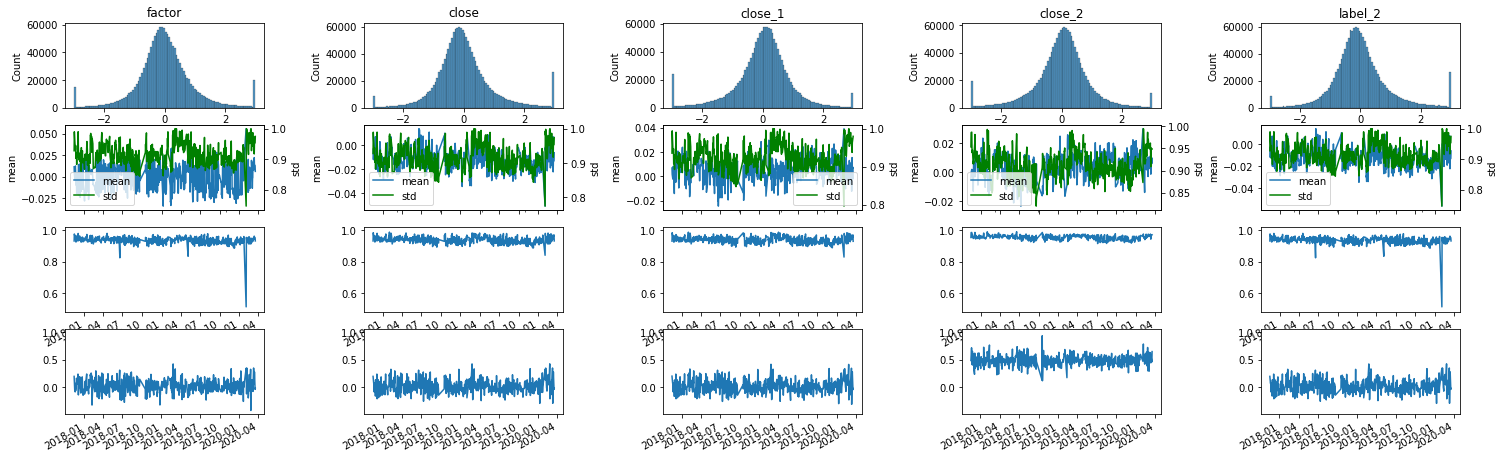

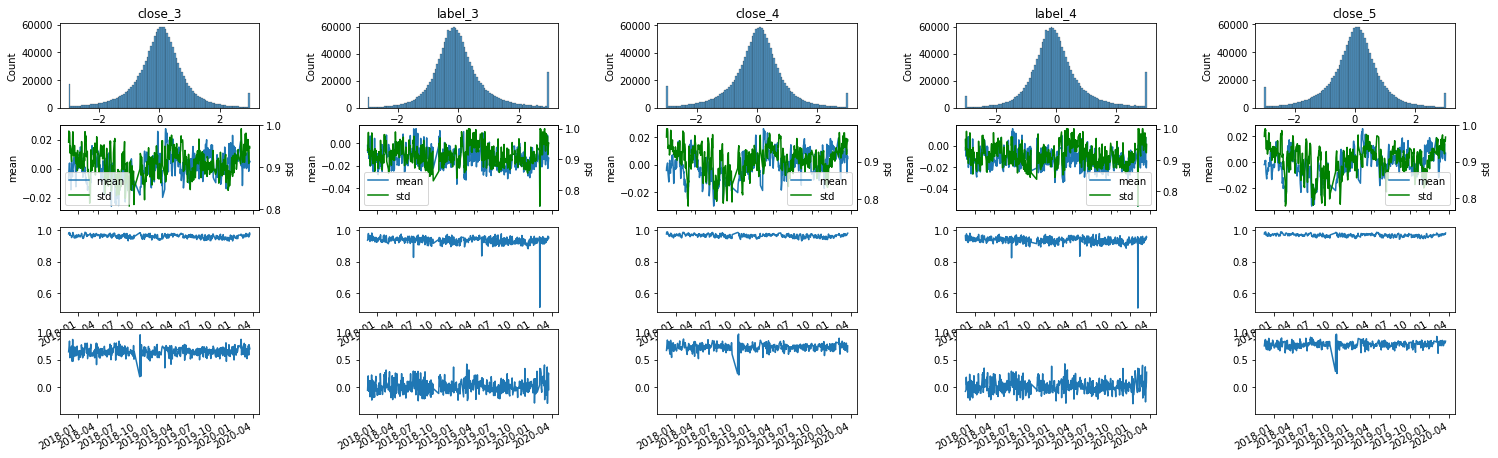

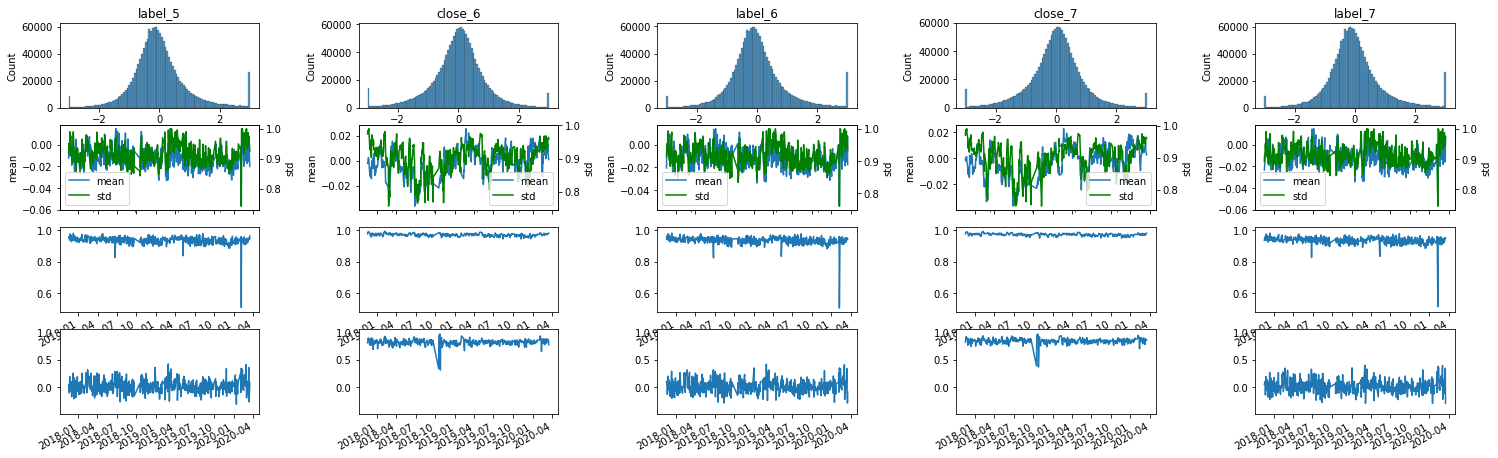

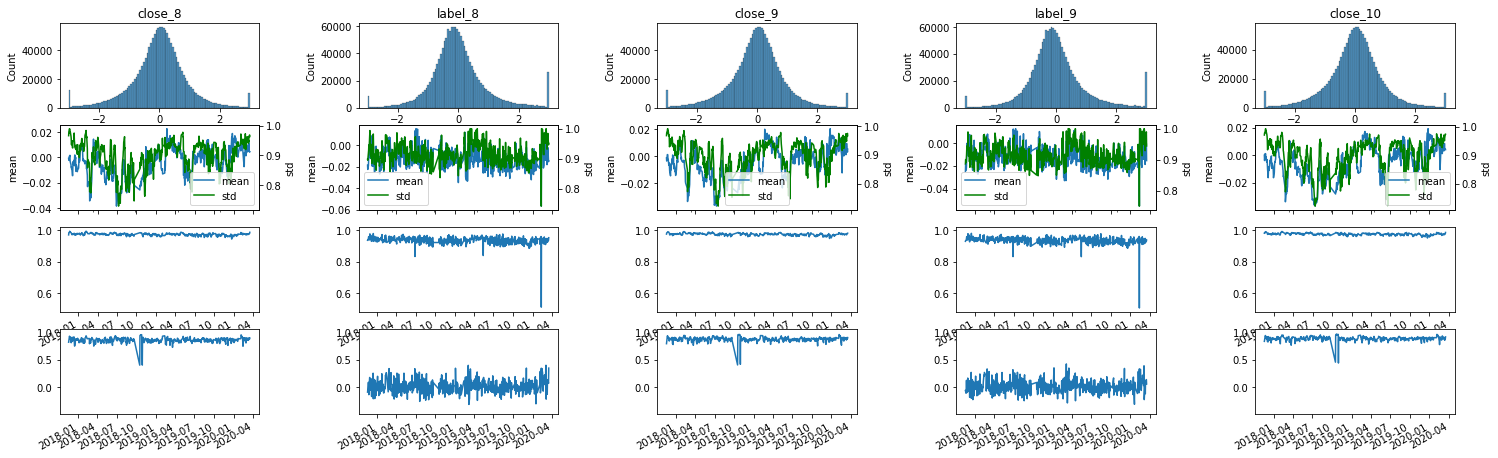

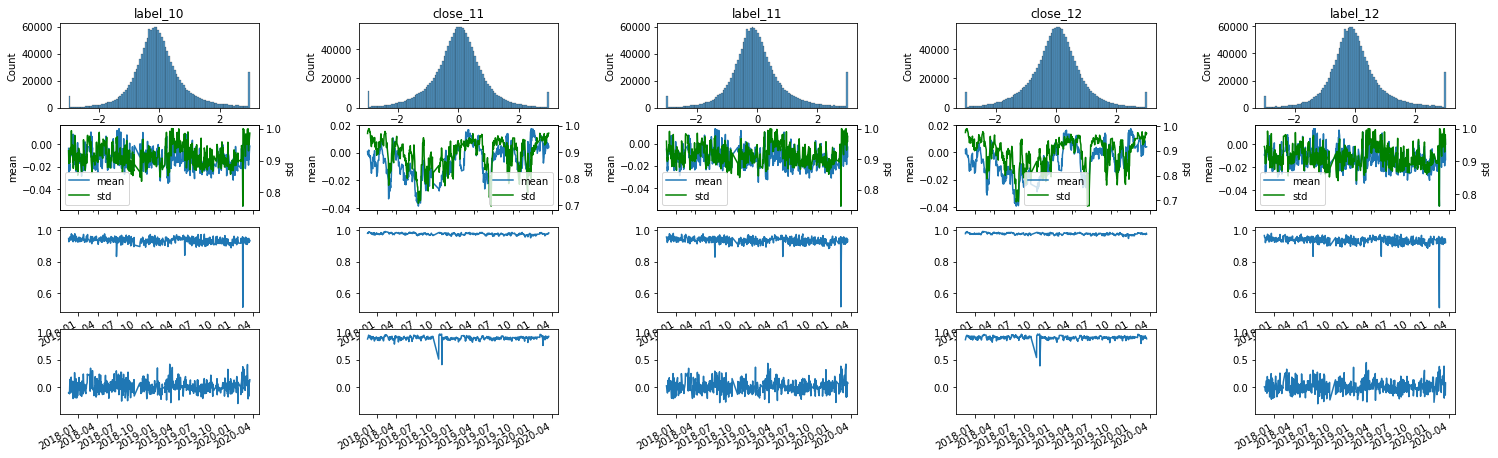

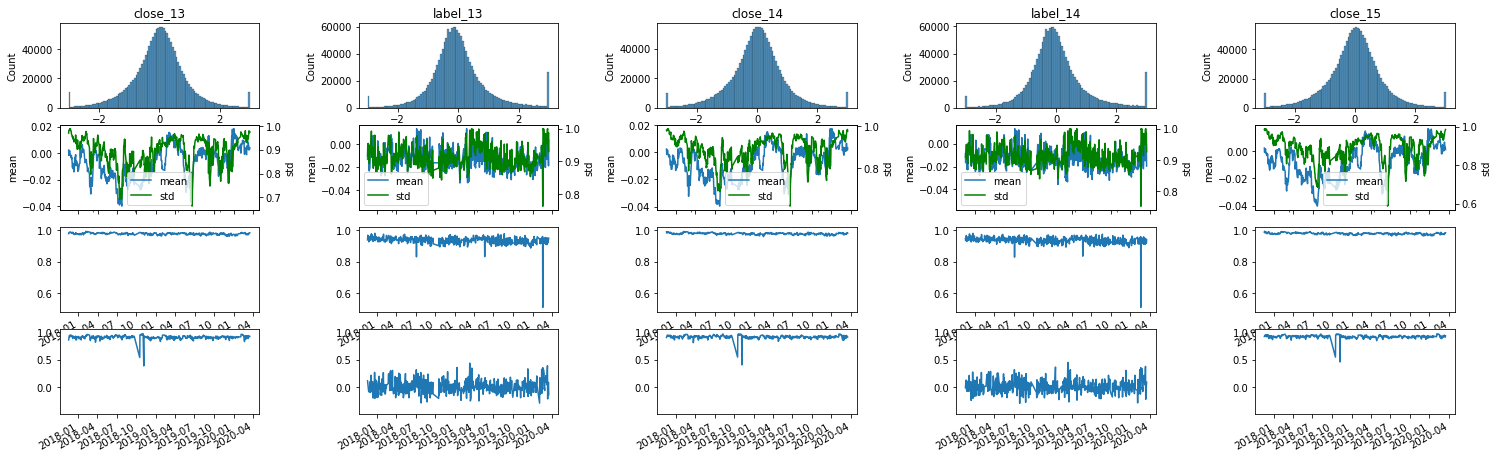

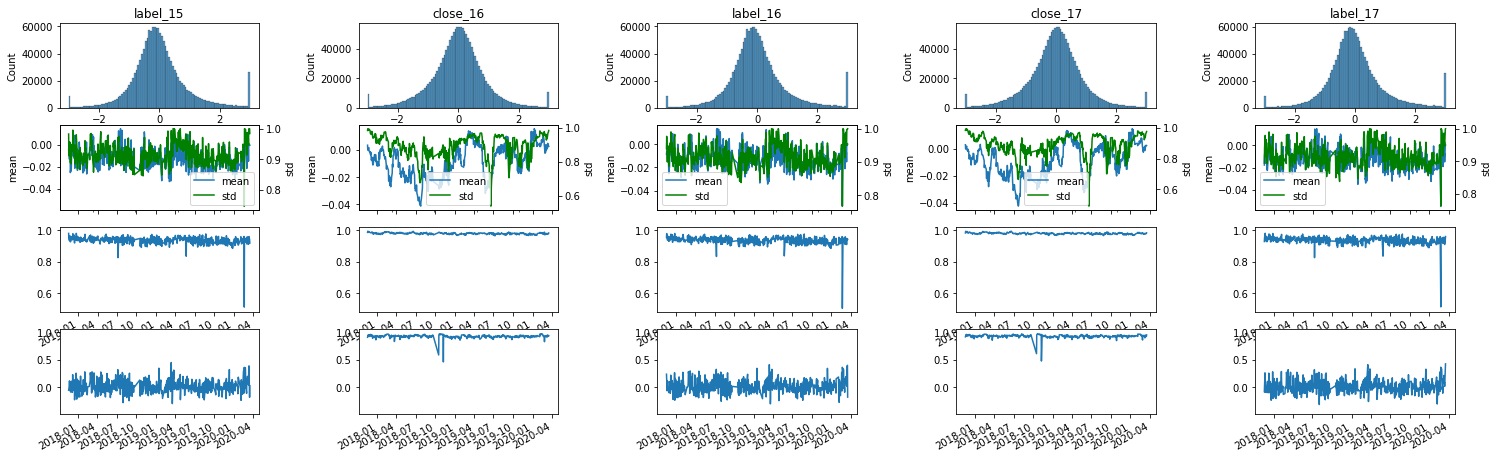

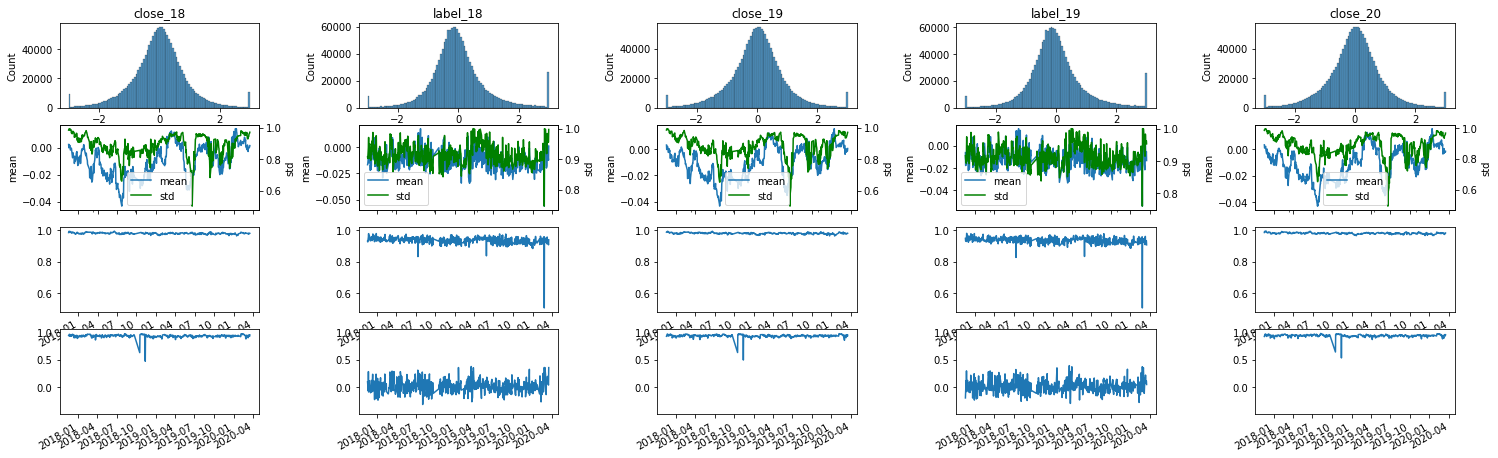

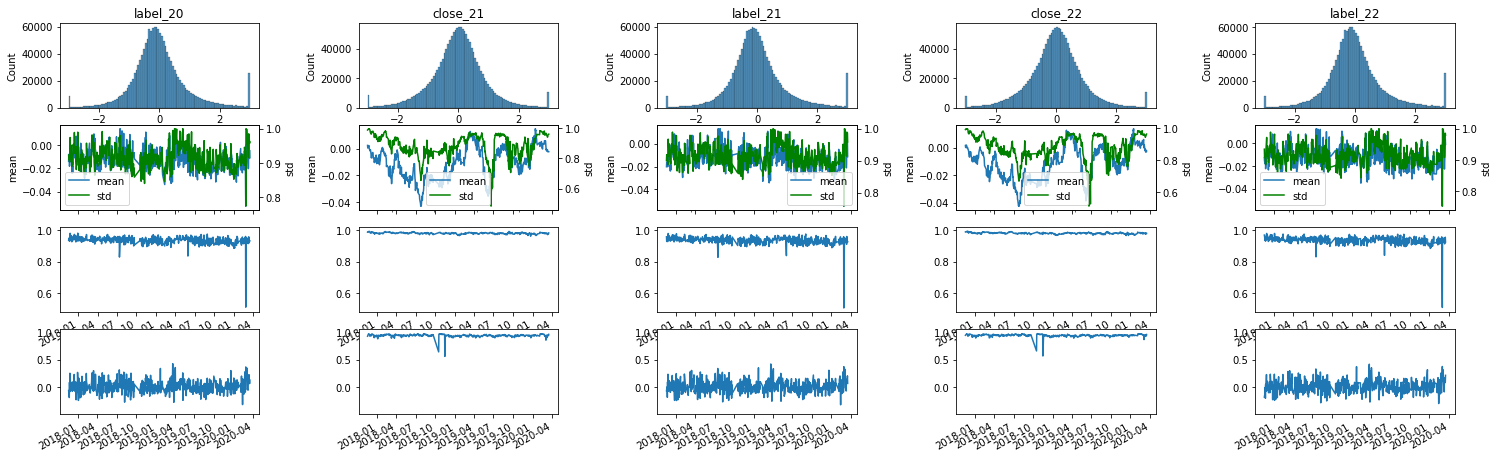

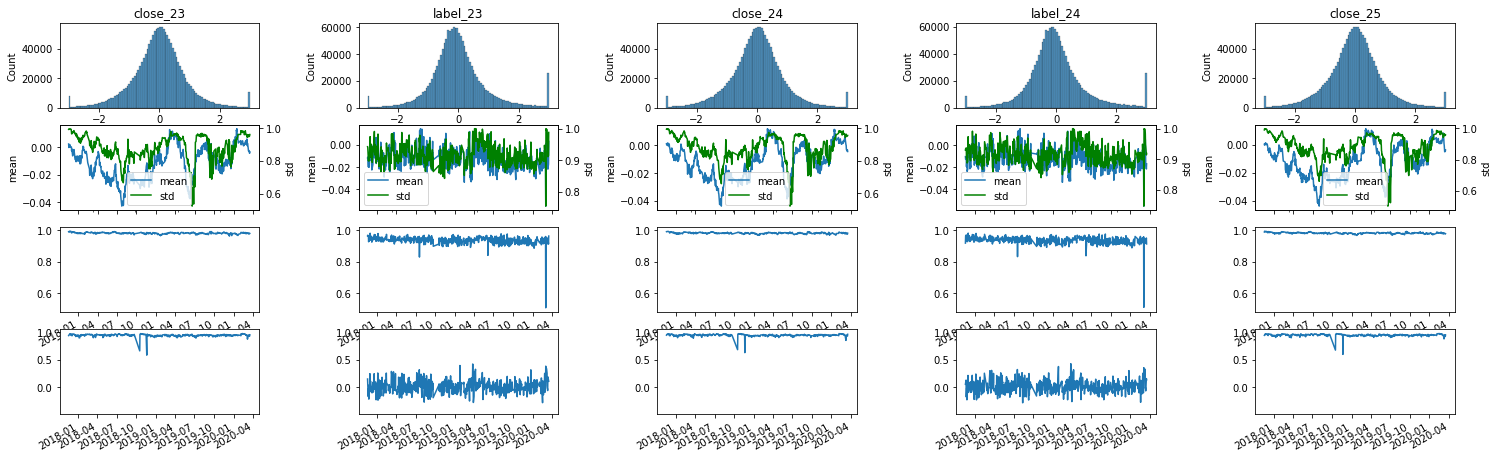

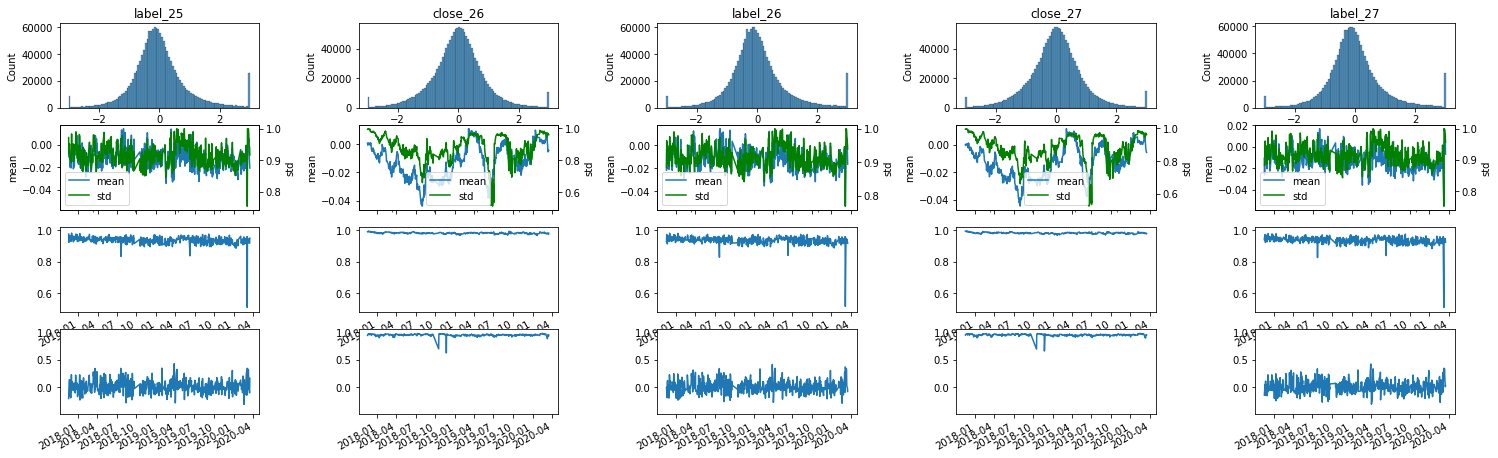

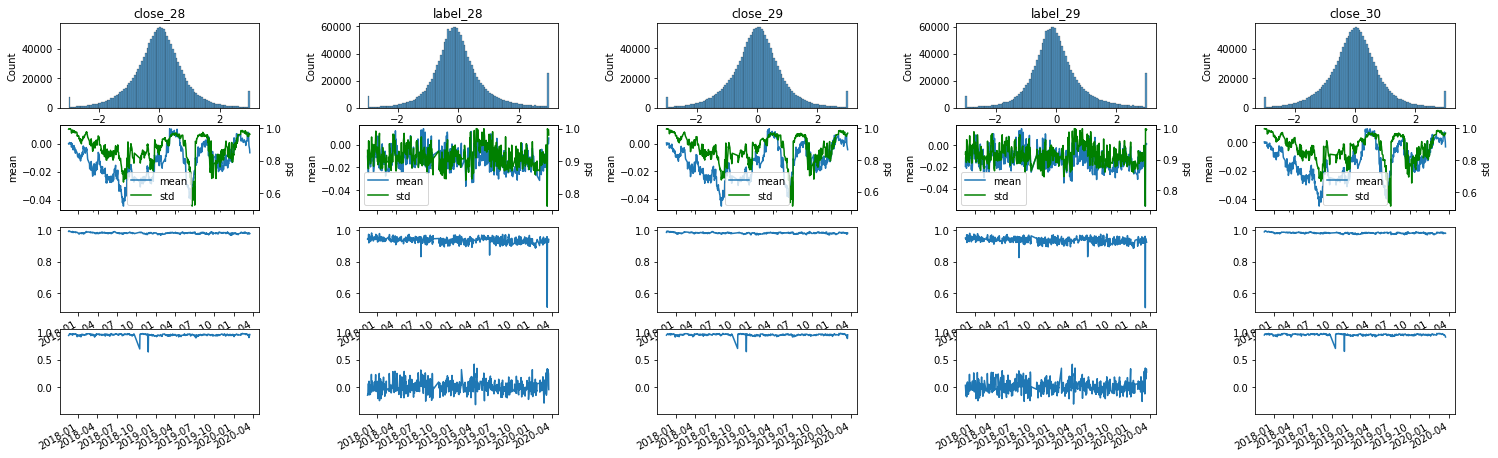

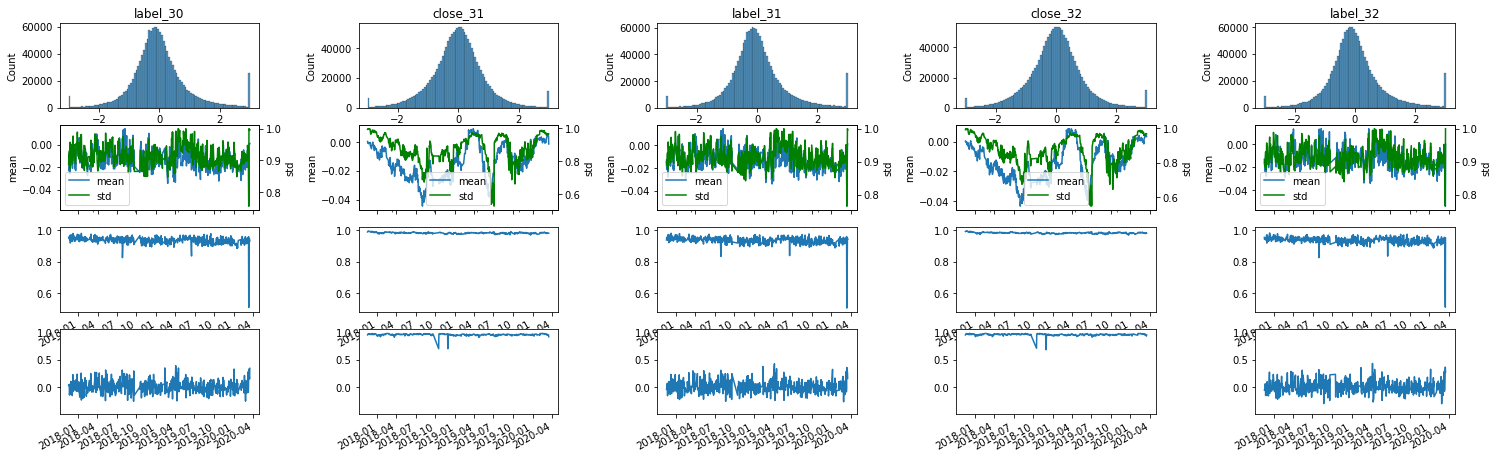

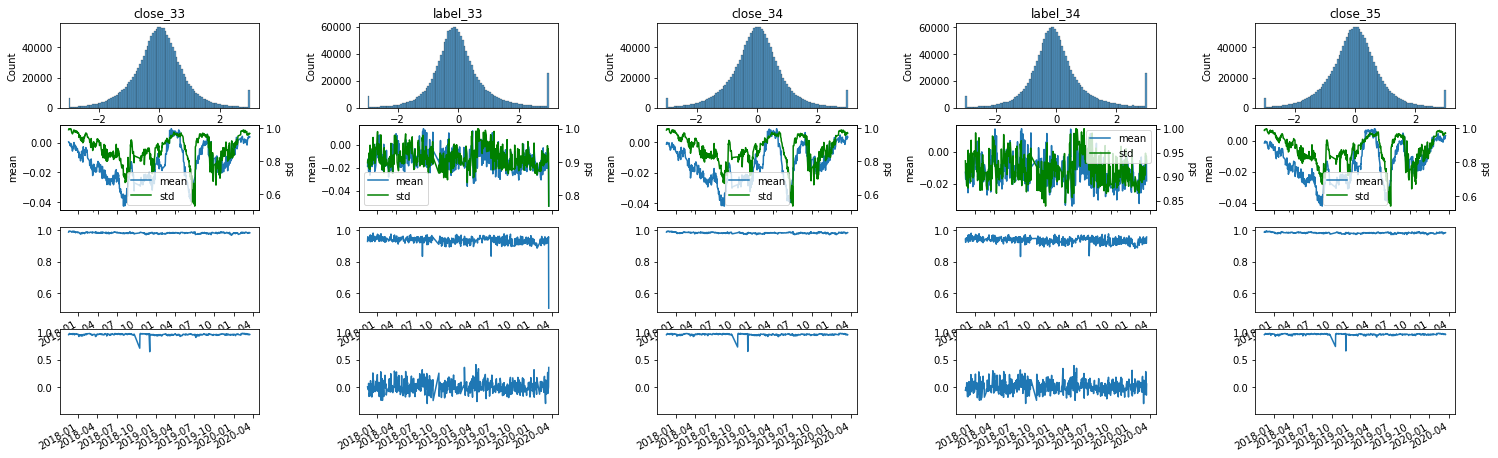

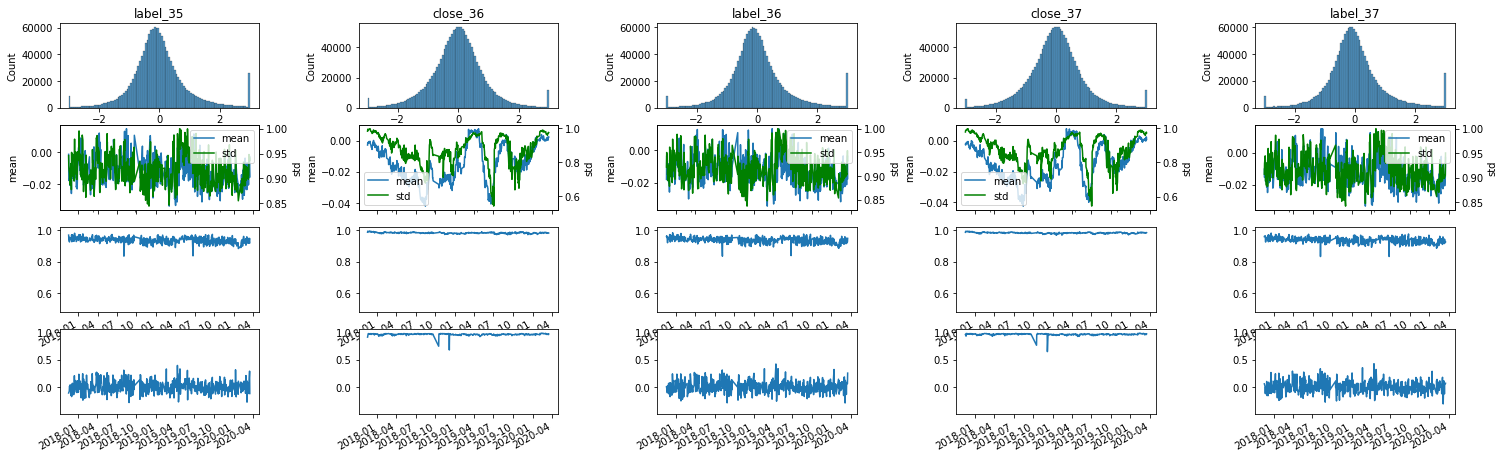

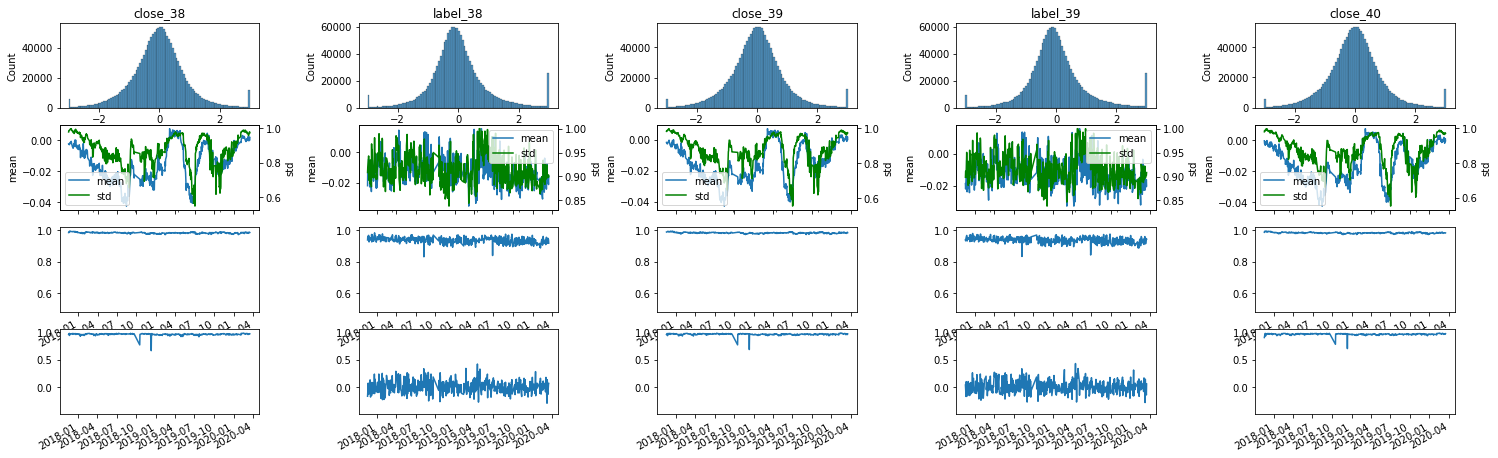

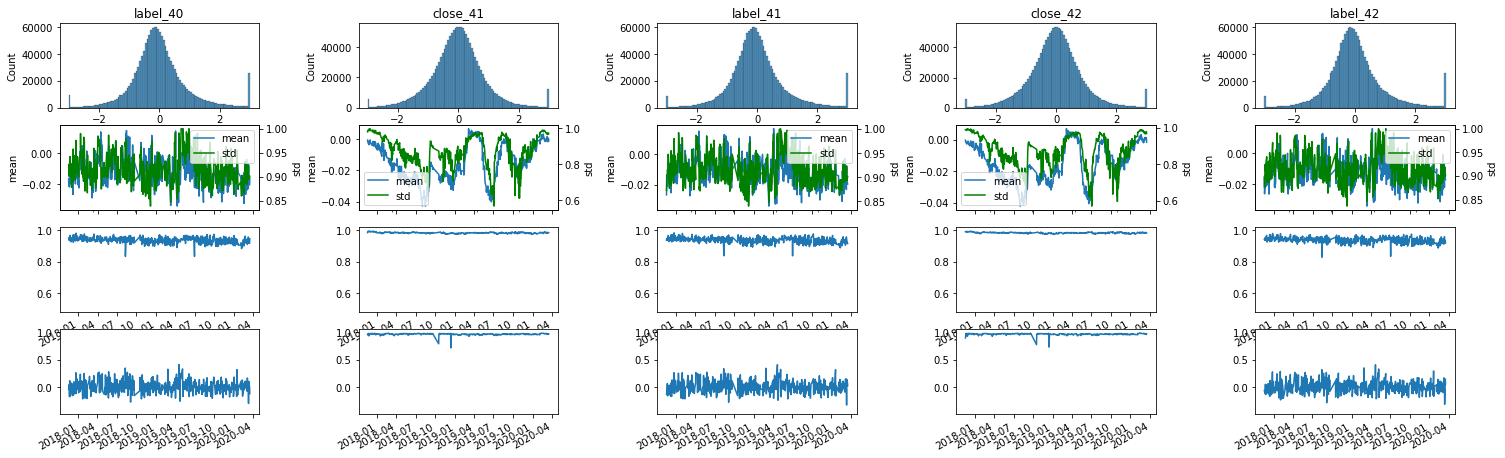

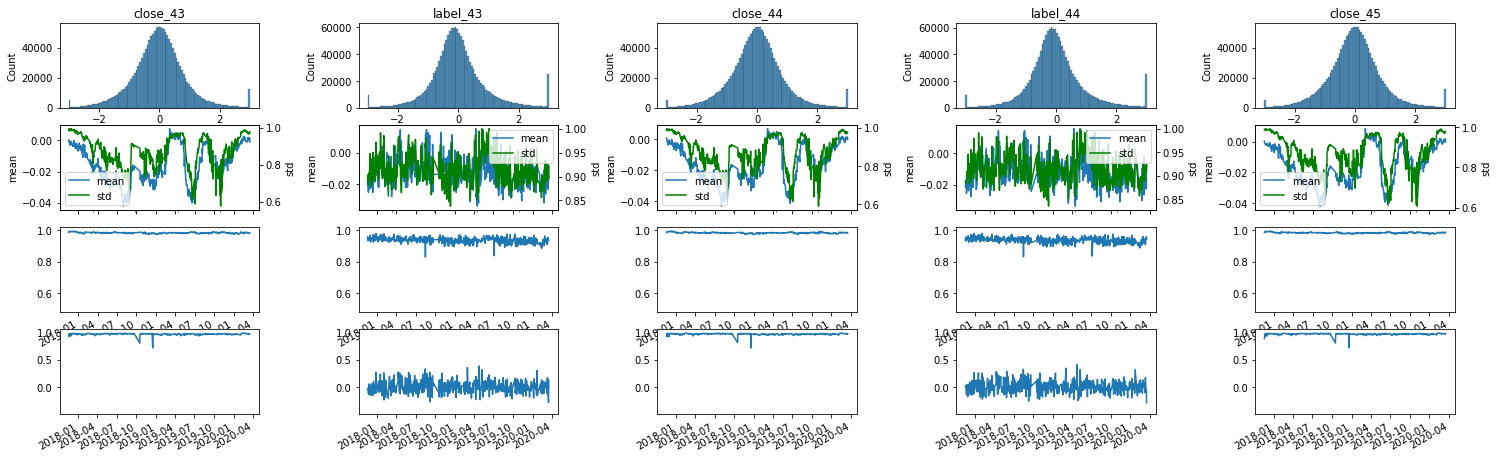

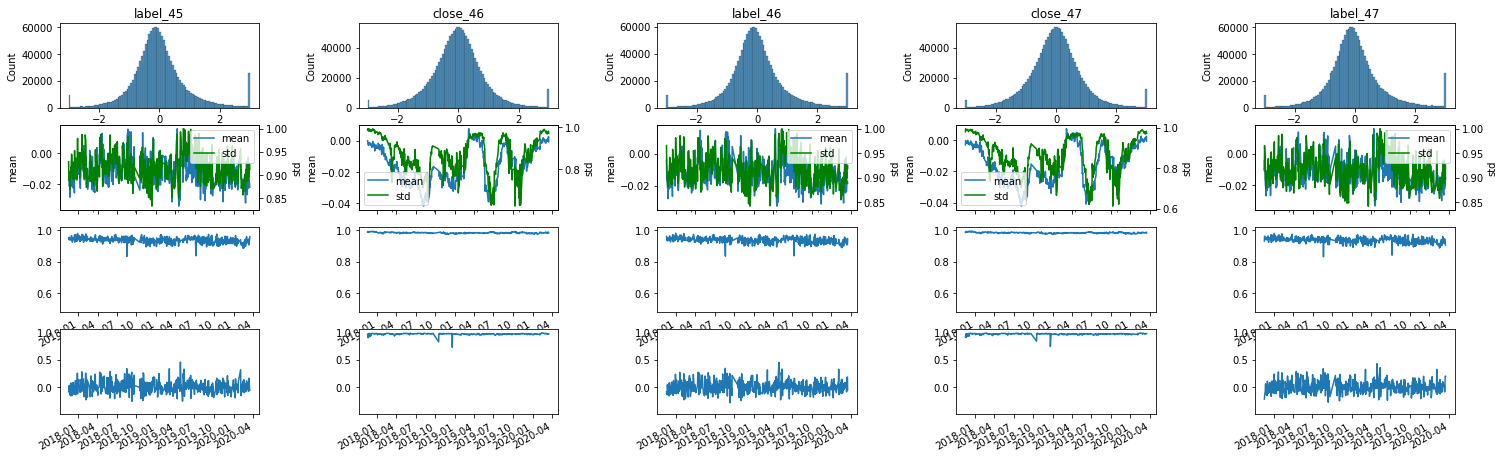

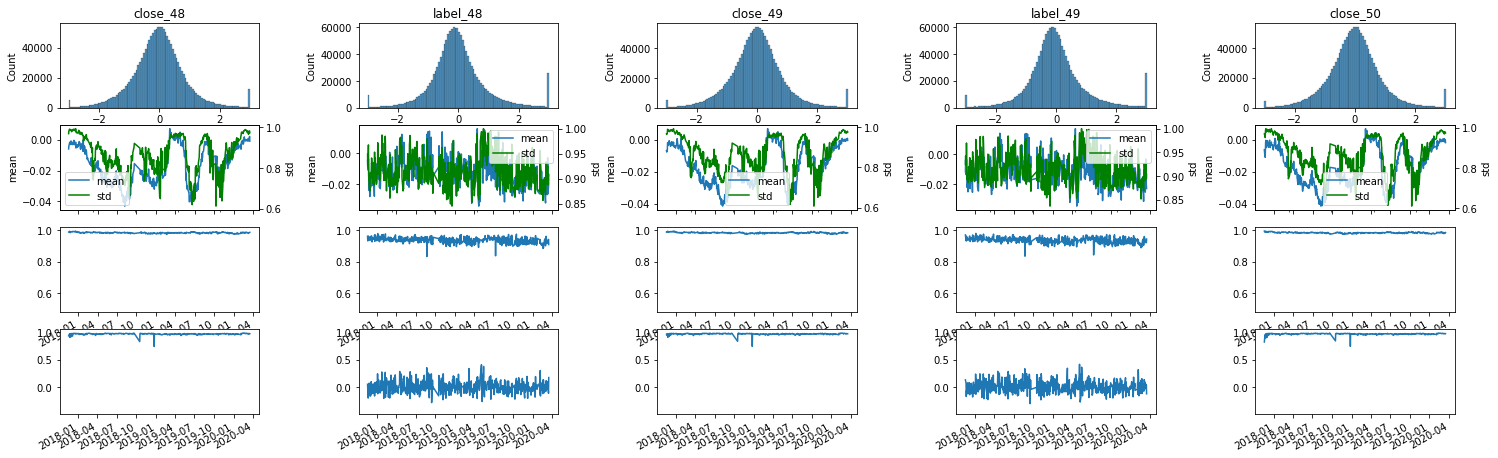

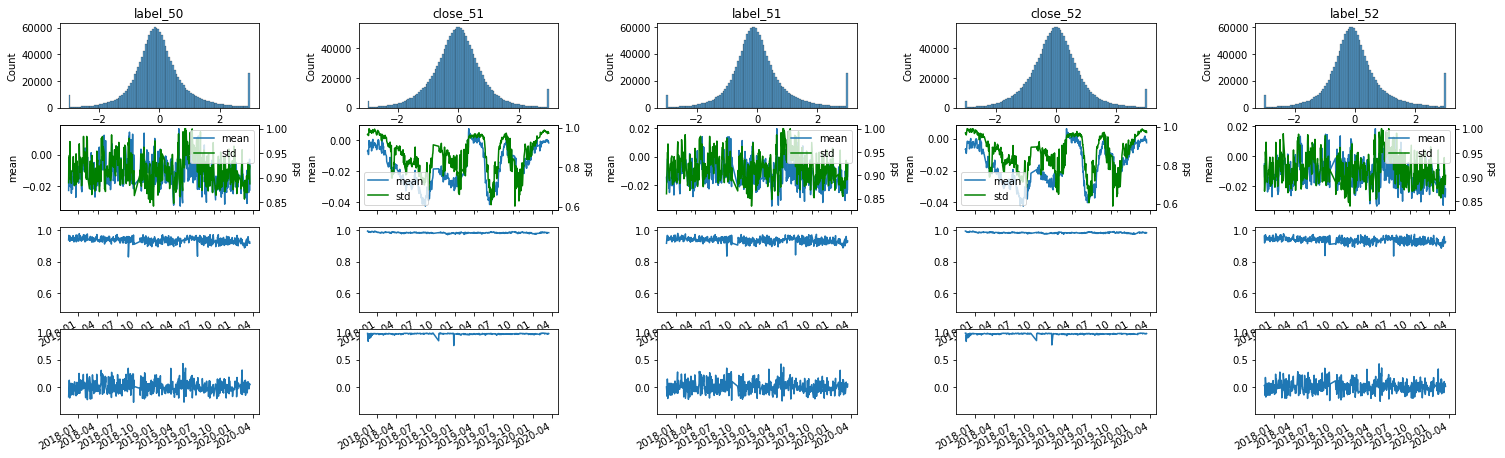

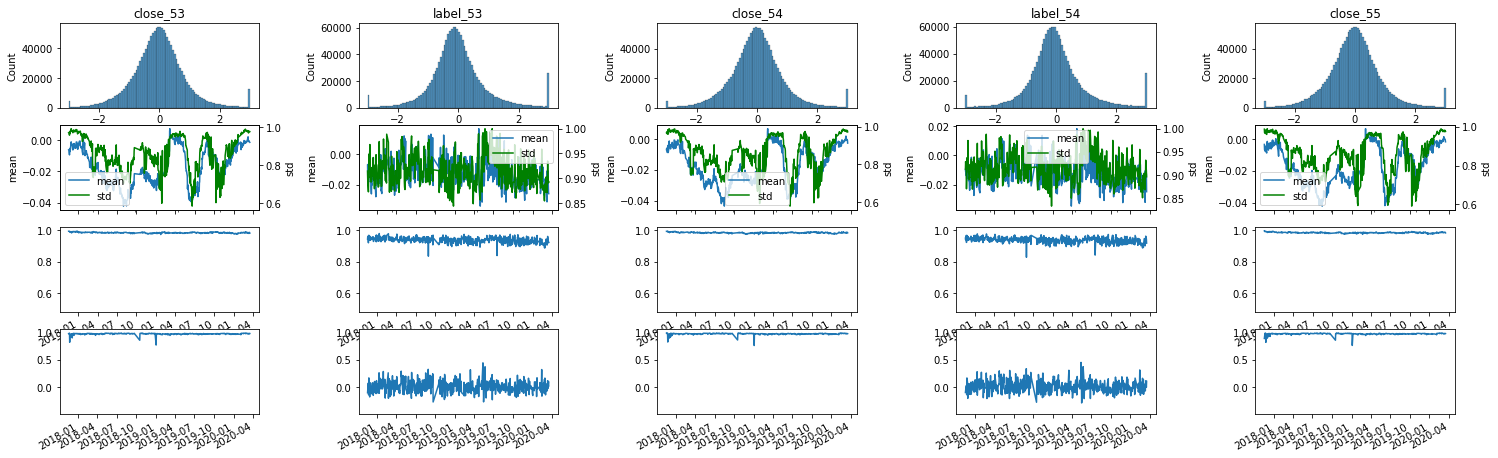

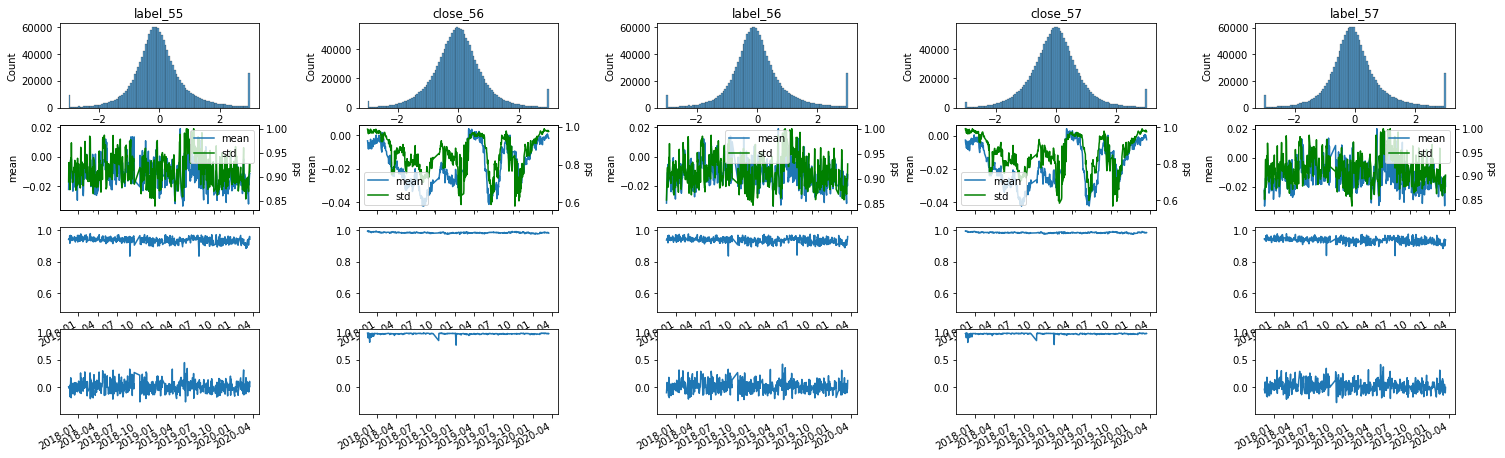

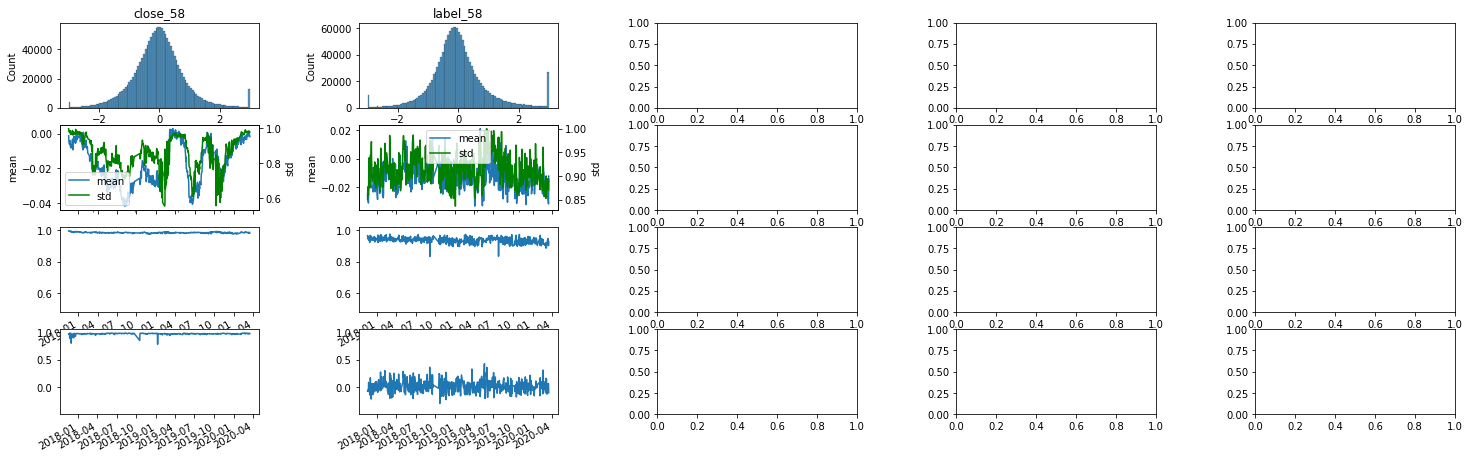

In [8]:
from functools import partial
from qlib.contrib.report.data.ana import CombFeaAna, FeaDistAna, FeaNanAnaRatio, FeaInfAna, FeaMeanStd, ValueCNT, FeaACAna, RawFeaAna

fa_full = CombFeaAna(X_train, FeaDistAna, FeaMeanStd, partial(ValueCNT, ratio=True), FeaACAna)
fa_full.plot_all(sub_fs=(5, 2), col_n=5, wspace=0.5)

因子性能分析: 下图统计了每个特征和Label和IC随时间如何变化 (moving average 100)  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done  98 out of 117 | elapsed:   34.0s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done 110 out of 117 | elapsed:   36.3s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done 117 out of 117 | elapsed:   37.2s finished


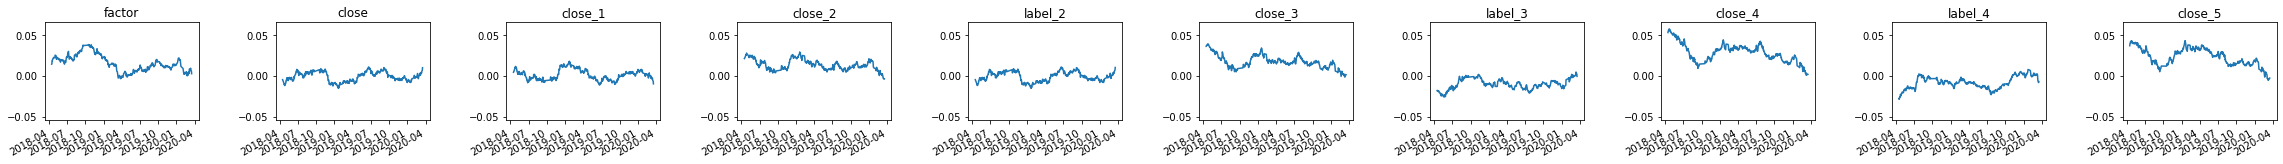

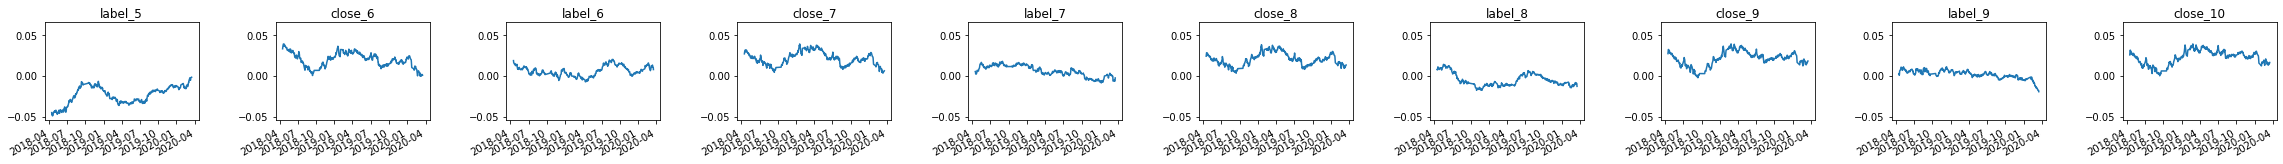

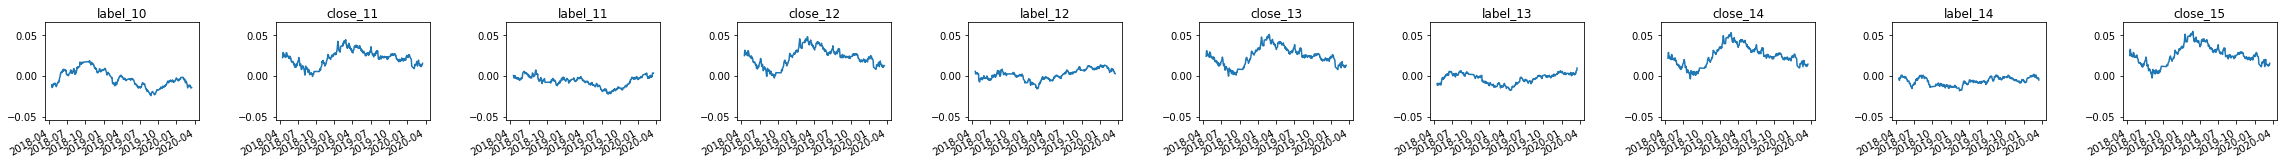

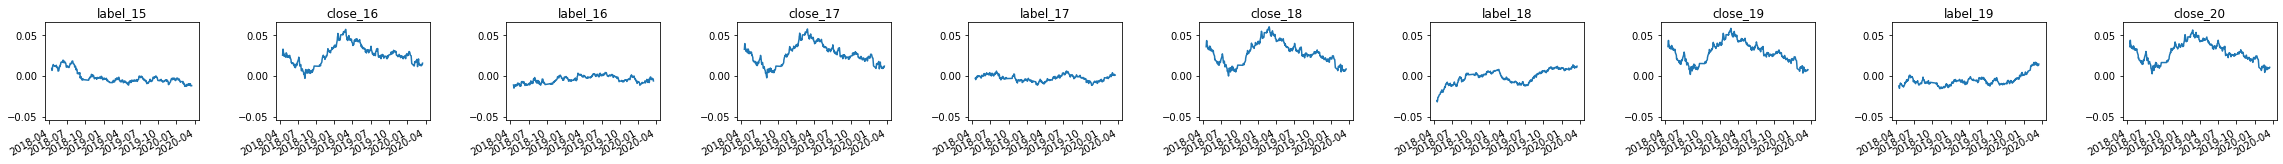

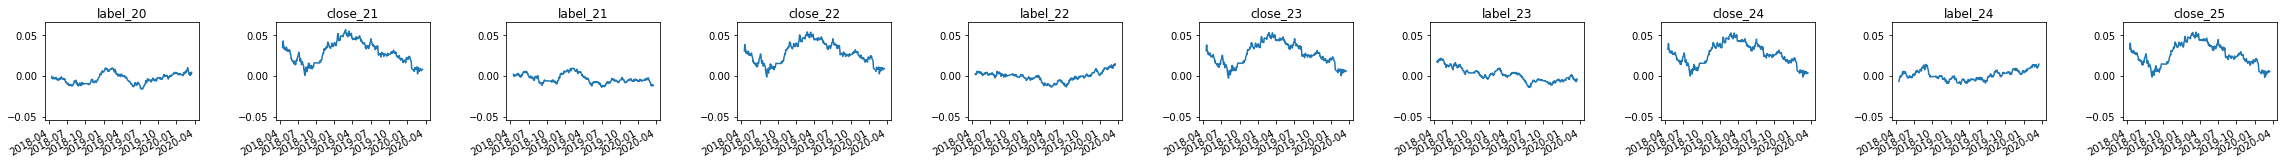

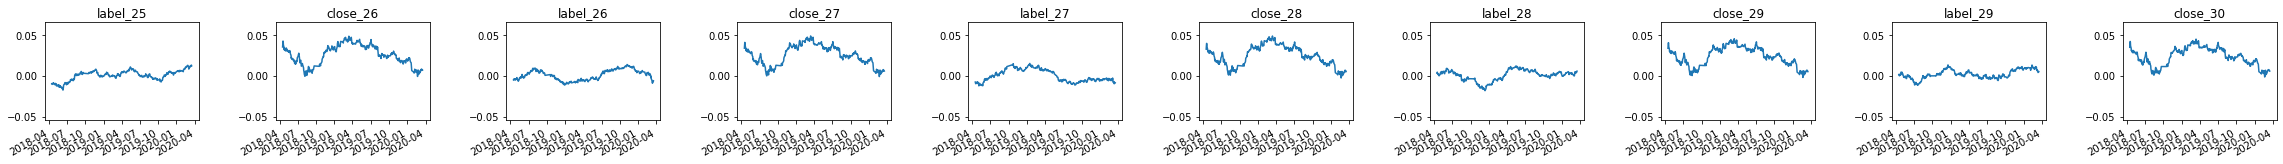

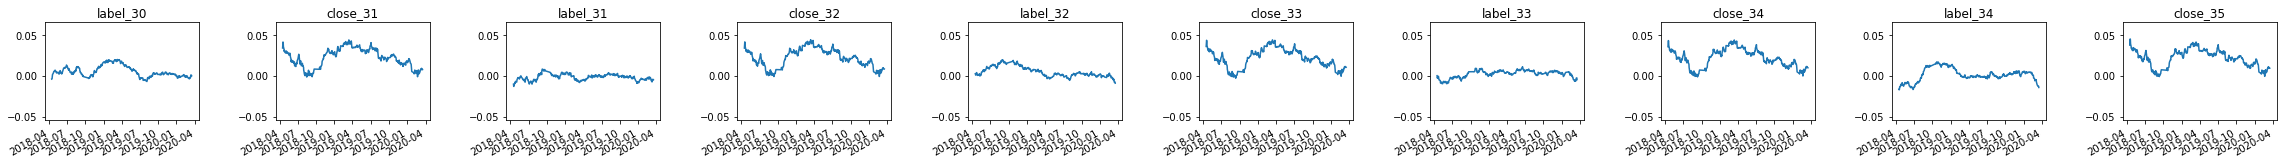

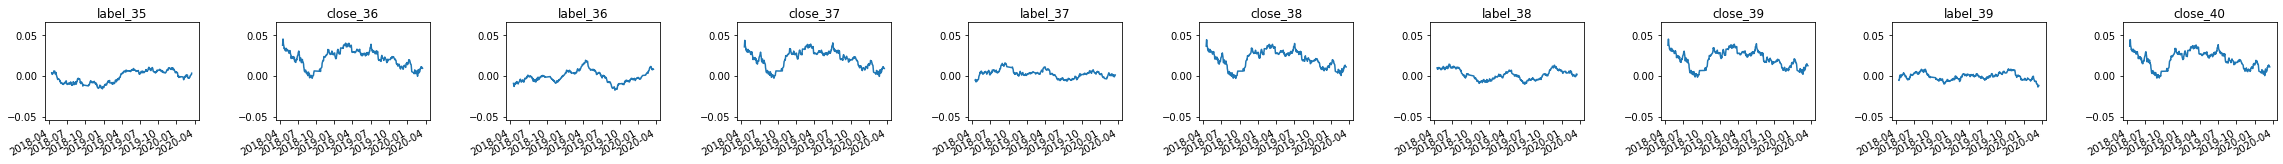

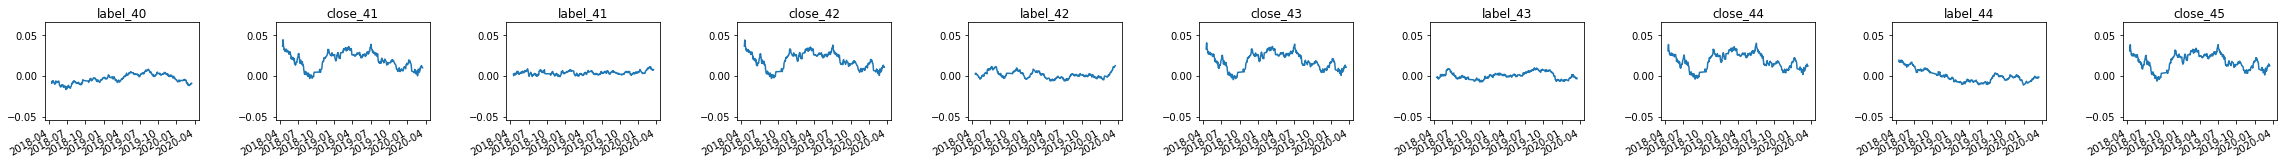

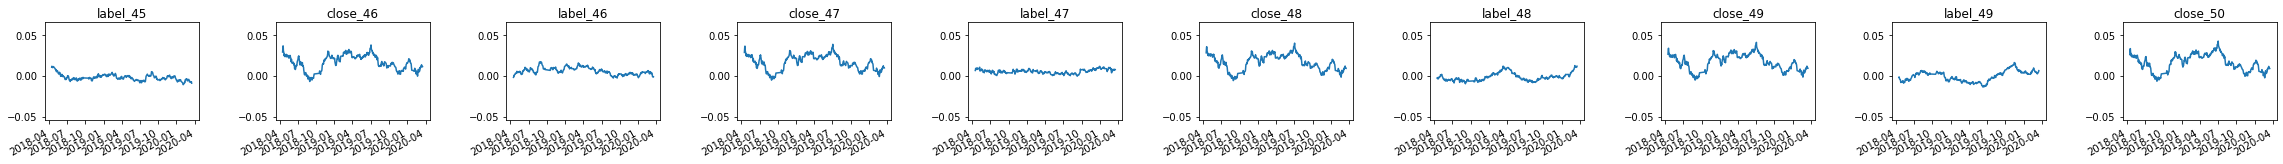

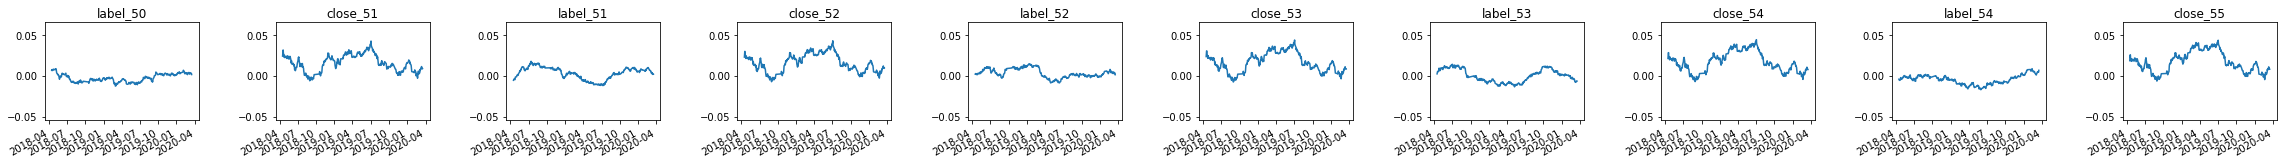

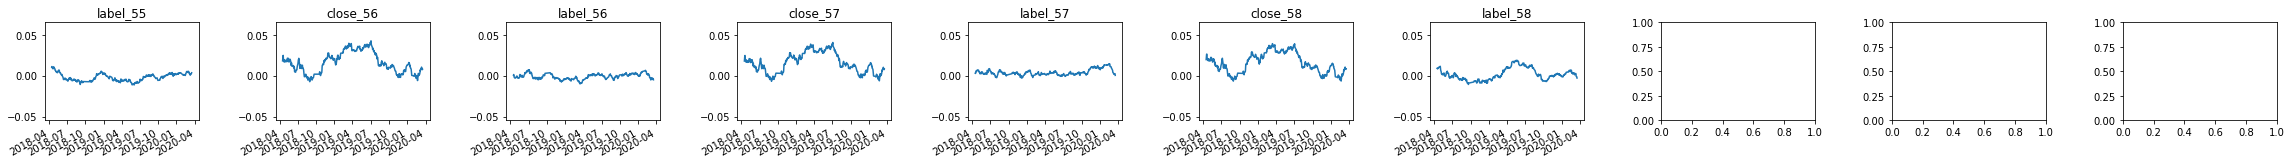

In [9]:
from qlib.contrib.eva.alpha import calc_all_ic
import pandas as pd

all_ic = calc_all_ic(X_train.to_dict('series'), y_train)
all_ic_df = pd.concat({f: d['ic'] for f, d in all_ic.items()})
all_ic_df = all_ic_df.unstack(0)

fa = RawFeaAna(all_ic_df.rolling(100).mean())
fa.plot_all(sub_fs=(4, 2), col_n=10, wspace=0.5)

因子在截面上的均值的均值

<AxesSubplot:>

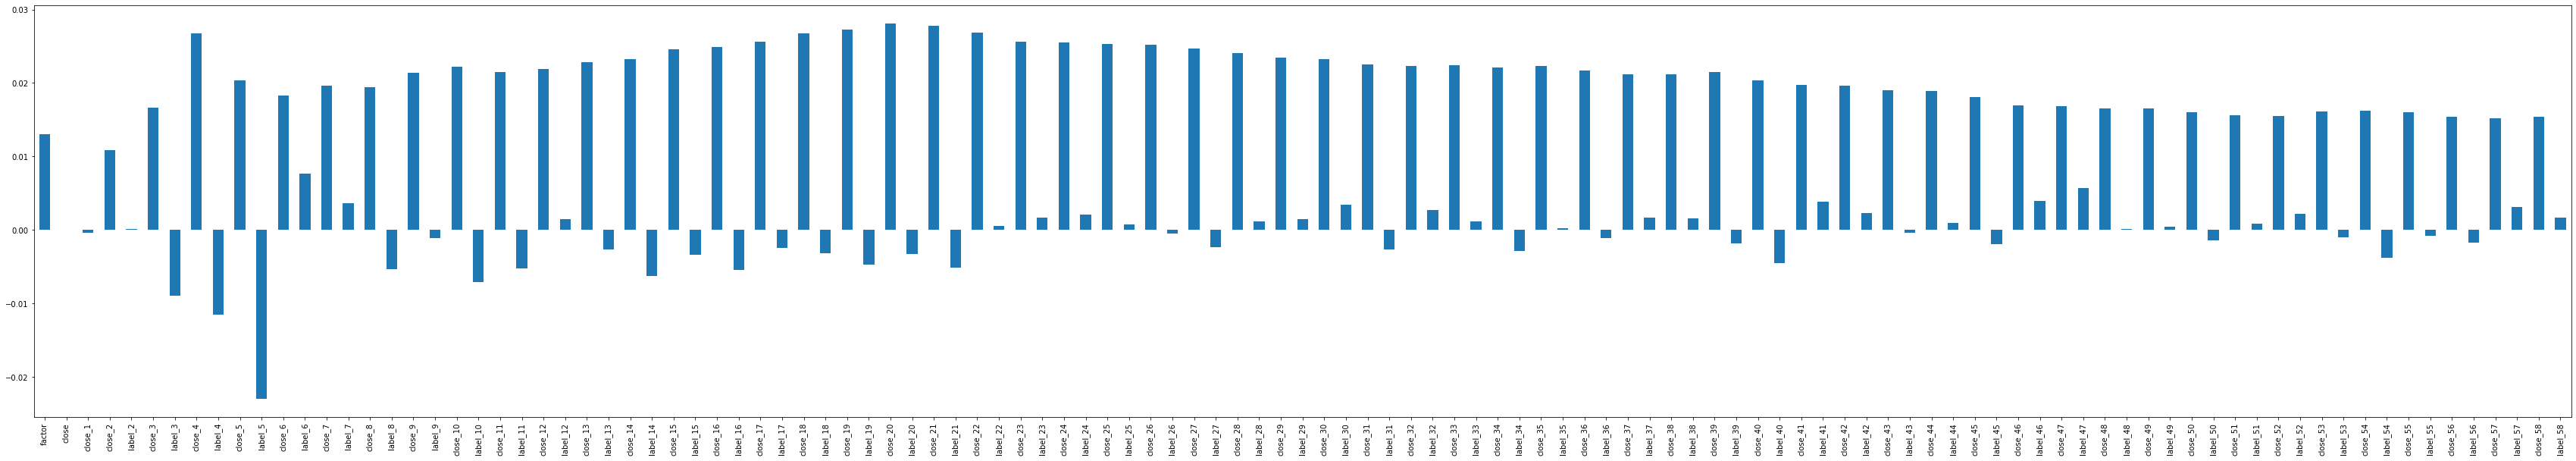

In [10]:
fig = all_ic_df.mean().plot(kind='bar', figsize=(60, 10))
fig

IC均值

In [11]:
all_ic_df.mean()

factor      0.013067
close       0.000064
close_1    -0.000414
close_2     0.010827
label_2     0.000120
              ...   
label_56   -0.001756
close_57    0.015169
label_57    0.003096
close_58    0.015428
label_58    0.001731
Length: 117, dtype: float64

ICIR

In [12]:
all_ic_df.mean() / all_ic_df.std()

factor      0.127589
close       0.000617
close_1    -0.004010
close_2     0.104089
label_2     0.001158
              ...   
label_56   -0.028770
close_57    0.123759
label_57    0.048094
close_58    0.127236
label_58    0.026845
Length: 117, dtype: float64

In [13]:
fig.figure.savefig("ic_mean.png")

使用lightGBM拟合多因子模型

In [14]:
model = q.auto_lgbm(X_train, y_train, X_valid, y_valid)

pred = model.predict(X_test)
pred = pd.DataFrame(pred, columns=["predict"], index=X_test.index)
pred["predict"] += y_mean
pred["predict"] *= y_std
pred.describe()

Training until validation scores don't improve for 30 rounds
[20]	train's l2: 0.835654	valid's l2: 0.839772
[40]	train's l2: 0.833813	valid's l2: 0.838616
[60]	train's l2: 0.832611	valid's l2: 0.837997
[80]	train's l2: 0.831679	valid's l2: 0.83762
[100]	train's l2: 0.830844	valid's l2: 0.837362
[120]	train's l2: 0.83005	valid's l2: 0.837134
[140]	train's l2: 0.829284	valid's l2: 0.836926
[160]	train's l2: 0.828566	valid's l2: 0.836753
[180]	train's l2: 0.827853	valid's l2: 0.836592
[200]	train's l2: 0.827162	valid's l2: 0.836438
[220]	train's l2: 0.826444	valid's l2: 0.836297
[240]	train's l2: 0.825778	valid's l2: 0.836201
[260]	train's l2: 0.825106	valid's l2: 0.836073
[280]	train's l2: 0.82446	valid's l2: 0.83596
[300]	train's l2: 0.823794	valid's l2: 0.835823
[320]	train's l2: 0.82316	valid's l2: 0.835727
[340]	train's l2: 0.822518	valid's l2: 0.835618
[360]	train's l2: 0.821866	valid's l2: 0.835519
[380]	train's l2: 0.821206	valid's l2: 0.835409
[400]	train's l2: 0.820597	valid's l

predict
count  1.990047e+06
mean  -3.783316e-04
std    2.331962e-03
min   -4.322601e-02
25%   -1.171604e-03
50%   -2.130293e-05
75%    9.228425e-04
max    2.058898e-02

预测值的IC均值,ICIR, 以及Rank_IC均值和Rank_ICIR

多因子模型的t统计量(用于衡量模型好坏)计算方式为: 
$$t = \frac{\bar{IC}}{\frac{\sigma_{IC}}{\sqrt{T}}} = ICIR \sqrt{T}$$

当IC不为正态分布时(下面第二张图描绘了IC的分布情况), 使用Rank_IC代替IC进行计算

回测时间为3年，即$T = 252*3 = 756$; 加入factor和不加factor的$\bar{IC}$和ICIR分别为(0.0358, 0.4849), (0.0351, 0.4676); $\bar{Rank\_IC}$和Rank_ICIR分别为(0.0323, 0.4971), (0.0318, 0.4973)

加入factor和不加factor的pearson相关系数分别为0.0314和0.0304

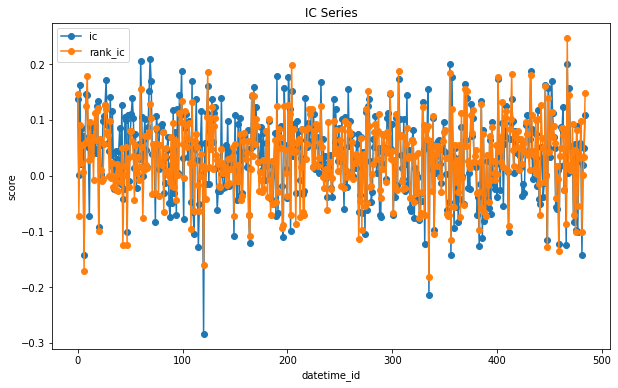

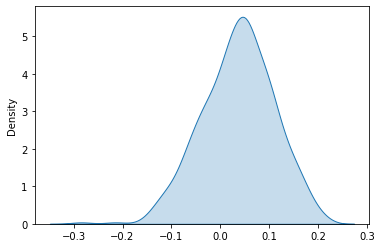

ic= 0.035753283077733754 icir= 0.48493919440055333 rank_ic= 0.03234304032615255 rank_icir= 0.4971443198250263


0.031398674504258636

In [15]:
ic, icir, rank_ic, rank_icir = q.ic_ana(pred["predict"], y_test, groupby='datetime')
print('ic=', ic, 'icir=', icir, 'rank_ic=', rank_ic, 'rank_icir=', rank_icir)
# 使用pearson相关系数评判拟合优度
r = q.pearson_corr(pred["predict"].values, y_test)
r

下面检查预测值与收益率的单调性. 除了第5组显著弱于其它组外，另外四组没有显著的单调性

Accuracy of Prediction: 0.5227107701476398


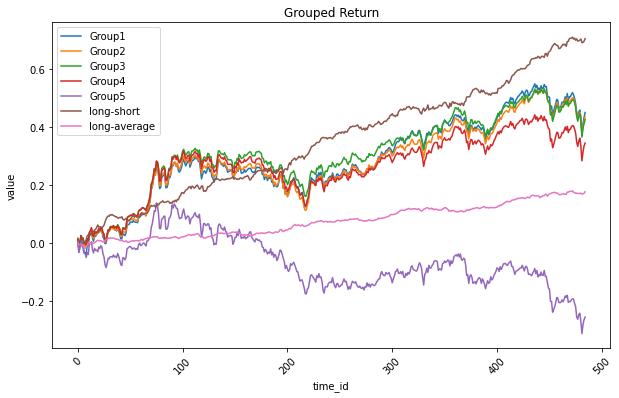

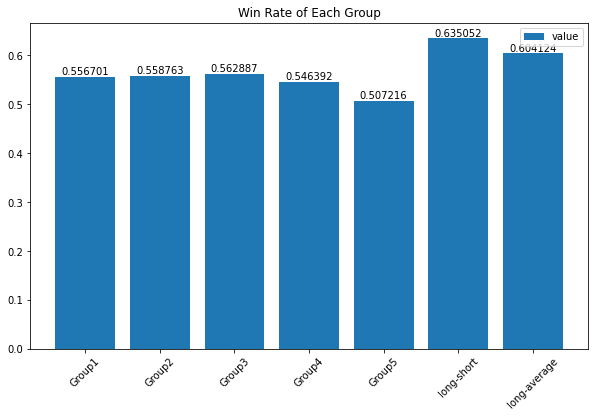

In [16]:
from scutquant import report

pred.index.names = ["time", "code"]
report.group_return_ana(pred, y_test)

In [19]:
pred["volume"] = 1000000
pred["price"] = data[data.index.get_level_values(0) >= "2020-03-17"]["close"].groupby("code").shift(1)
pred.dropna(inplace=True)
pred

predict   volume    price
time       code                                 
2020-03-18 000001.SZ  0.000324  1000000  1592.11
           000002.SZ -0.002069  1000000  3877.34
           000004.SZ -0.002011  1000000   264.78
           000005.SZ -0.000986  1000000    29.14
           000006.SZ  0.000213  1000000   215.44
...                        ...      ...      ...
2022-03-16 688799.SH -0.000903  1000000    35.00
           688800.SH  0.000092  1000000    89.40
           688819.SH  0.000645  1000000    30.95
           688981.SH -0.000405  1000000    45.29
           689009.SH  0.003929  1000000    40.88

[1990024 rows x 3 columns]

In [22]:
from scutquant import executor

backtest = {
    "generator": {
        "mode": "generate"
    },
    "strategy": {
        "class": "SigmaStrategy",  # 每天做多预测值大于mean + n*sigam的股票, 做空预测值小于mean - n*sigma的股票
        "kwargs": {
            "sigma": 2,
            "auto_offset": False,
            "offset_freq": 2, # 应为delta_t + 1, 例如目标值是close_-2 / close_-1 - 1, 则delta_t = 1
            "buy_only": False,  # =True时，只做多不做空(在A股做空有一定的难度)
            "short_volume": 5000,  # 为0时，只能用底仓做空；>0 时, 融券做空
            "risk_degree": 0.95,  # 将风险度控制在这个数，如果超过了就按比例减持股票直到风险度小于等于它为止
            "unit": None,  # 由于数据已经是以手为单位, 故无需二次处理
            "max_volume": 0.5  # 手数随可用资金而改变，最大不会超过股票当天成交量的x%(例如T+1时下单，下单手数不会超过T时成交量的x%)
        }
    },
    "account": None,  # 使用默认账户, 即初始资金为1亿, 无底仓
    "cost": {
        "cost_buy": 0.0015,  # 佣金加上印花税
        "cost_sell": 0.0005,  
        "min_cost": 5,
    }
}
generator, strategy, account, cost = backtest["generator"], backtest["strategy"], backtest["account"], backtest["cost"]
exe = executor.Executor(generator, strategy, account, cost)
exe.execute(data=pred, verbose=0)

Annualized Return: 0.28510445214401536
Annualized Volatility: 0.3116054693777446
Annualized Return(Benchmark): 0.12334660277910459
Annualized Volatility(Benchmark): 0.188897327039204 

Cumulative Rate of Return: 0.6205530206756407
Cumulative Rate of Return(Benchmark): 0.250889578
Cumulative Excess Rate of Return: 0.36966344267564066 

Max Drawdown: -0.2891469122901784
Max Drawdown(Benchmark): -0.24713911300000002 

Sharpe Ratio: 2.333618643432757
Sortino Ratio: nan
Information Ratio: 1.216254268824807 

Beta: 1.6057216954827482
Alpha: 0.1211166104210748
Epsilon: 0.05146224602147791
Profitable Days(%): 0.9979381443298969


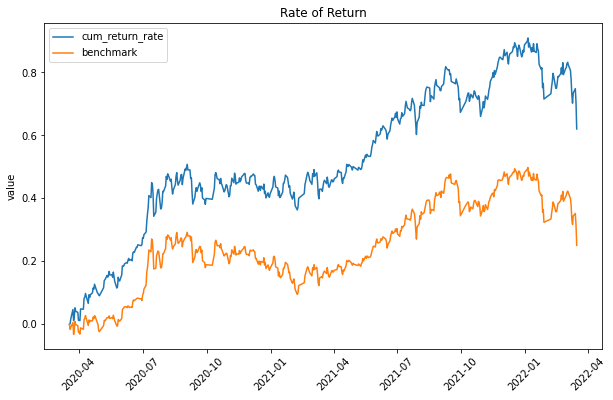

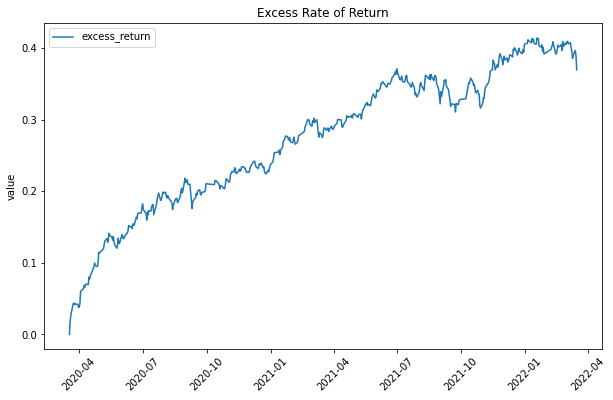

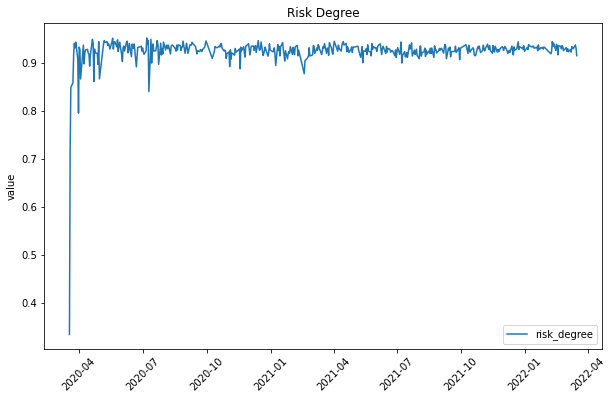

In [23]:
user_account, benchmark = exe.user_account, exe.benchmark
report.report_all(user_account, benchmark, freq=365, time=exe.time)  # 无风险收益率默认为年化3%，可以通过参数rf调节